In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bangladesh_divisions_dataset.csv")

In [3]:
df.head()

Location Soil_Type  Fertility_Index Land_Use_Type  Average_Rainfall(mm)  \
0   Sylhet     Loamy               62  Agricultural                    72   
1    Dhaka     Sandy               63        Unused                   118   
2  Rangpur     Peaty               51  Agricultural                   106   
3   Khulna     Sandy               67        Barren                   336   
4  Rangpur     Peaty               63  Agricultural                   237   

   Temperature(°C) Crop_Suitability   Season Satellite_Observation_Date  \
0             28.6            Wheat  Monsoon                 2024-09-24   
1             23.8            Maize   Autumn                 2024-01-31   
2             32.0            Maize   Autumn                 2024-03-11   
3             31.6            Wheat   Autumn                 2024-09-29   
4             20.1             Rice   Winter                 2024-04-01   

              Remarks  
0  Requires attention  
1  Moderate potential  
2  Requires attention  
3       Low potential  
4  Moderate potential

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    2000 non-null   object 
 1   Soil_Type                   2000 non-null   object 
 2   Fertility_Index             2000 non-null   int64  
 3   Land_Use_Type               2000 non-null   object 
 4   Average_Rainfall(mm)        2000 non-null   int64  
 5   Temperature(°C)             2000 non-null   float64
 6   Crop_Suitability            2000 non-null   object 
 7   Season                      2000 non-null   object 
 8   Satellite_Observation_Date  2000 non-null   object 
 9   Remarks                     2000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB


In [5]:
df.describe()

Fertility_Index  Average_Rainfall(mm)  Temperature(°C)
count       2000.00000           2000.000000      2000.000000
mean          70.10450            223.136000        27.330250
std           17.97699            100.548543         4.341251
min           40.00000             50.000000        20.000000
25%           54.00000            137.000000        23.500000
50%           70.00000            222.500000        27.300000
75%           86.00000            308.000000        31.000000
max          100.00000            400.000000        35.000000

In [6]:
df.isnull().sum()

Location                      0
Soil_Type                     0
Fertility_Index               0
Land_Use_Type                 0
Average_Rainfall(mm)          0
Temperature(°C)               0
Crop_Suitability              0
Season                        0
Satellite_Observation_Date    0
Remarks                       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print("Unique locations: ", df['Location'].unique())

Unique locations:  ['Sylhet' 'Dhaka' 'Rangpur' 'Khulna' 'Rajshahi' 'Chattogram' 'Barishal'
 'Mymensingh']


In [9]:
df.rename(columns={
    'Average_Rainfall(mm)': 'RainfallMM',
    'Temperature(°C)': 'TemperatureC'
}, inplace=True)

In [10]:
df

Location Soil_Type  Fertility_Index Land_Use_Type  RainfallMM  \
0         Sylhet     Loamy               62  Agricultural          72   
1          Dhaka     Sandy               63        Unused         118   
2        Rangpur     Peaty               51  Agricultural         106   
3         Khulna     Sandy               67        Barren         336   
4        Rangpur     Peaty               63  Agricultural         237   
...          ...       ...              ...           ...         ...   
1995    Barishal     Loamy               65        Unused         278   
1996  Chattogram      Clay               52   Residential         224   
1997     Rangpur      Clay               97        Barren          84   
1998    Rajshahi     Sandy               85   Residential         209   
1999      Sylhet     Sandy               73  Agricultural         134   

      TemperatureC Crop_Suitability   Season Satellite_Observation_Date  \
0             28.6            Wheat  Monsoon                 2024-09-24   
1             23.8            Maize   Autumn                 2024-01-31   
2             32.0            Maize   Autumn                 2024-03-11   
3             31.6            Wheat   Autumn                 2024-09-29   
4             20.1             Rice   Winter                 2024-04-01   
...            ...              ...      ...                        ...   
1995          20.3           Spices   Summer                 2024-02-12   
1996          29.3             Jute   Winter                 2024-08-20   
1997          25.6             Jute   Summer                 2024-09-07   
1998          23.5             Rice   Summer                 2024-08-23   
1999          20.2            Wheat   Winter                 2024-11-01   

                 Remarks  
0     Requires attention  
1     Moderate potential  
2     Requires attention  
3          Low potential  
4     Moderate potential  
...                  ...  
1995  Requires attention  
1996  Moderate potential  
1997  Requires attention  
1998  Moderate potential  
1999  Moderate potential  

[2000 rows x 10 columns]

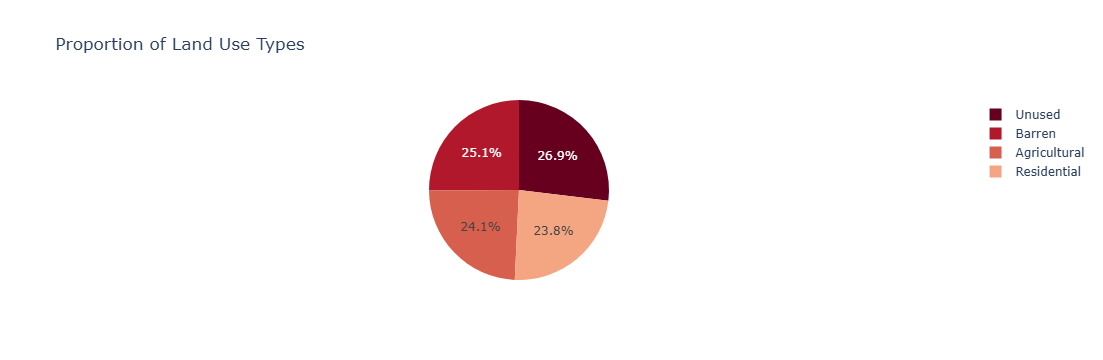

In [11]:
fig2 = px.pie(df, names='Land_Use_Type', title='Proportion of Land Use Types',
              color_discrete_sequence=px.colors.sequential.RdBu)
fig2.show()

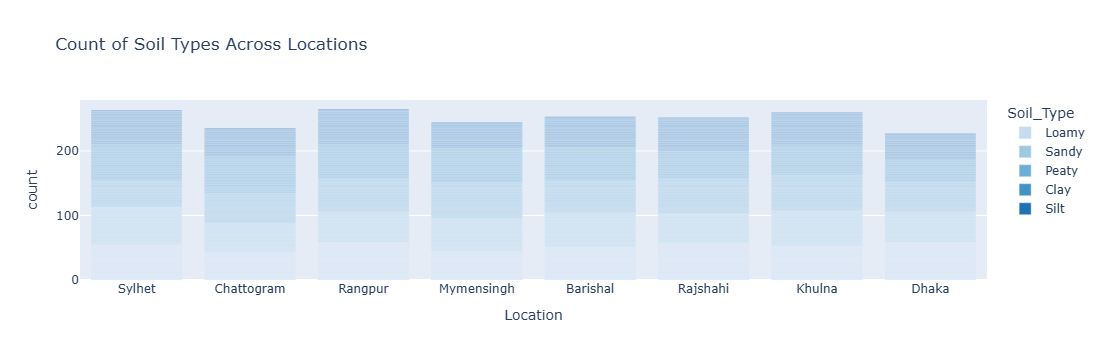

In [12]:
fig1 = px.bar(df, x='Location', color='Soil_Type', title='Count of Soil Types Across Locations',
              color_discrete_sequence=px.colors.sequential.Blues[2:])
fig1.show()

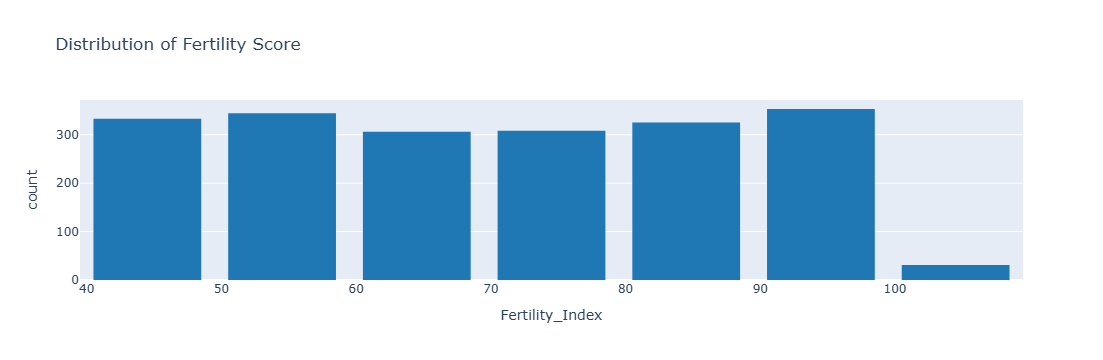

In [13]:
fig3 = px.histogram(df, x='Fertility_Index', nbins=10, title='Distribution of Fertility Score',
                    color_discrete_sequence=['#1F77B4'])
fig3.update_layout(bargap=0.2)
fig3.show()

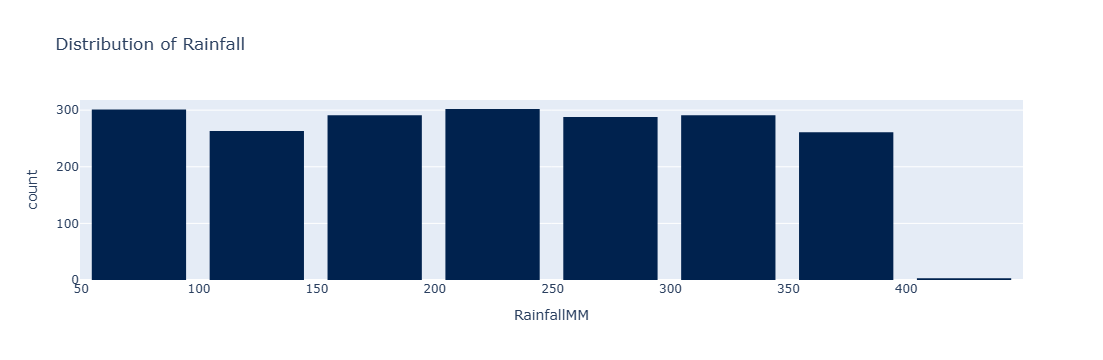

In [14]:
fig4 = px.histogram(df, x='RainfallMM', nbins=10, title='Distribution of Rainfall',
                    color_discrete_sequence=px.colors.sequential.Cividis)
fig4.update_layout(bargap=0.2)
fig4.show()

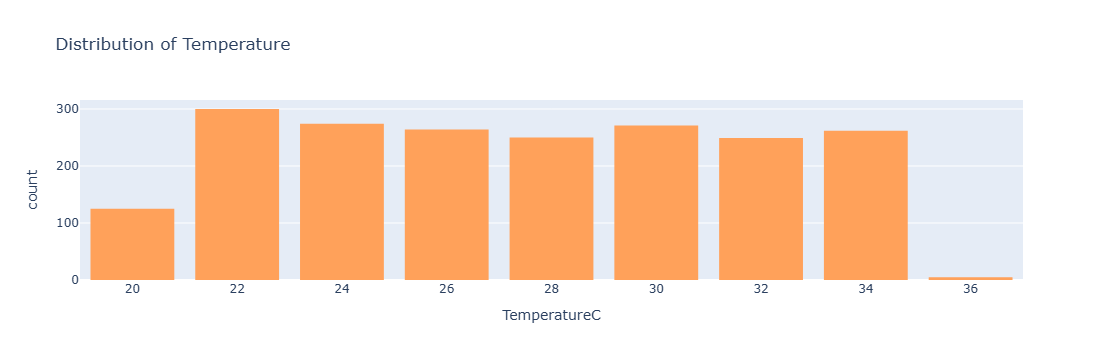

In [15]:
fig5 = px.histogram(df, x='TemperatureC', nbins=10, title='Distribution of Temperature',
                    color_discrete_sequence=['#FFA15A'])
fig5.update_layout(bargap=0.2)
fig5.show()

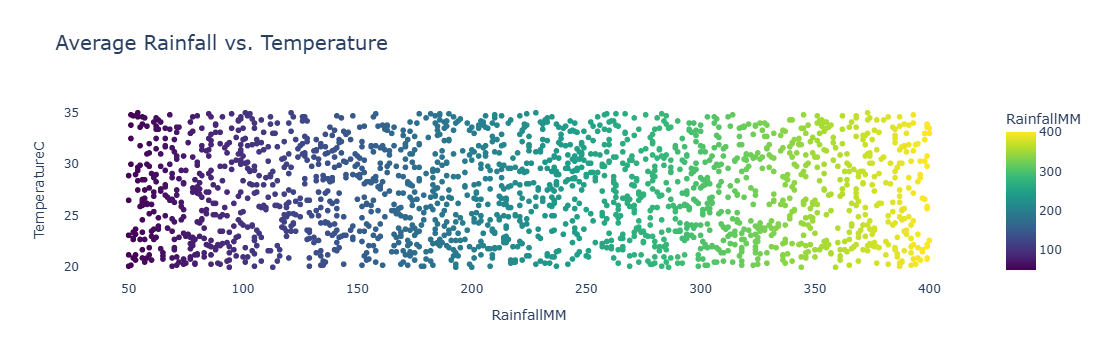

In [16]:
fig6 = px.scatter(df, x='RainfallMM', y='TemperatureC', title='Average Rainfall vs. Temperature',
                  color='RainfallMM', color_continuous_scale='Viridis')

fig6.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', title_font_size=20, font=dict(size=12))
fig6.show()

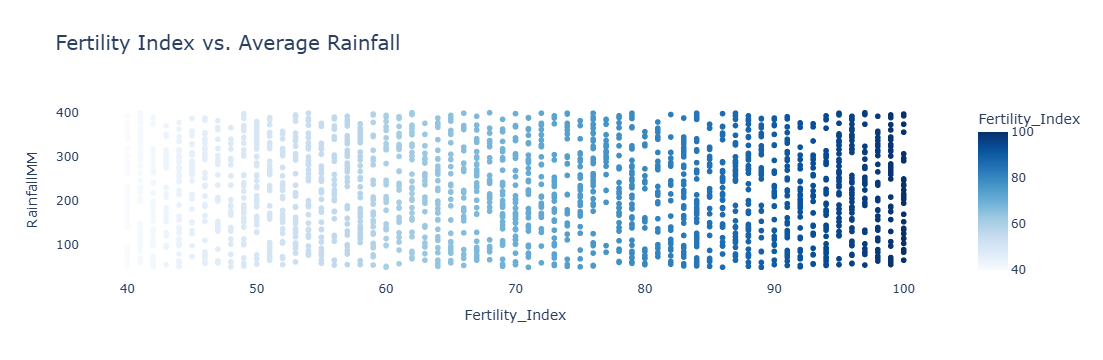

In [17]:
fig7 = px.scatter(df, x='Fertility_Index', y='RainfallMM', title='Fertility Index vs. Average Rainfall',
                  color='Fertility_Index', color_continuous_scale='Blues')

fig7.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', title_font_size=20, font=dict(size=12))
fig7.show()

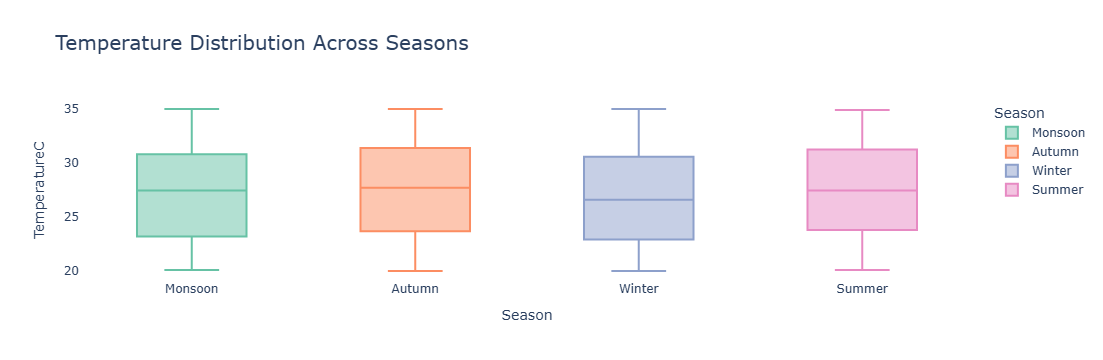

In [18]:
fig8 = px.box(df, x='Season', y='TemperatureC', title='Temperature Distribution Across Seasons',
              color='Season', color_discrete_sequence=px.colors.qualitative.Set2)

fig8.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', title_font_size=20, font=dict(size=12))
fig8.show()

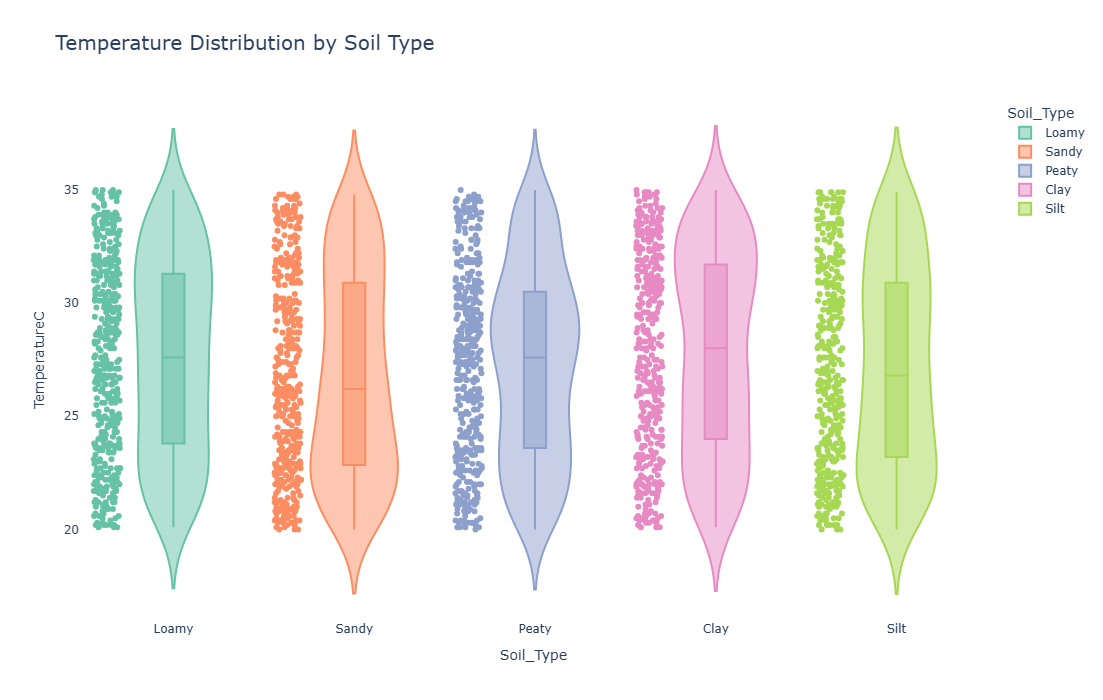

In [19]:
fig9 = px.violin(df, y='TemperatureC', x='Soil_Type', box=True, points="all", 
                 title="Temperature Distribution by Soil Type",
                 color='Soil_Type',
                 color_discrete_sequence=px.colors.qualitative.Set2)

fig9.update_layout(
    width=900,
    height=700,
    title_font_size=20,
    font=dict(size=12),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig9.show()

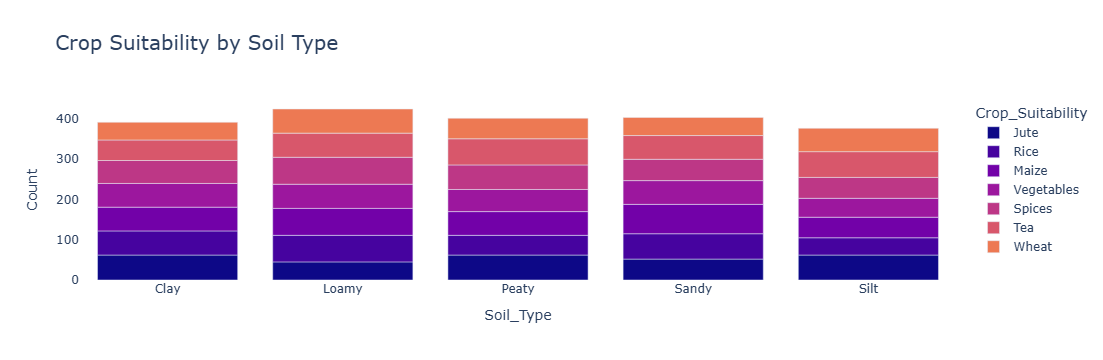

In [20]:
fig10 = px.bar(df.groupby('Soil_Type')['Crop_Suitability'].value_counts().reset_index(name='Count'), 
               x='Soil_Type', y='Count', color='Crop_Suitability', 
               title='Crop Suitability by Soil Type',
               color_discrete_sequence=px.colors.sequential.Plasma)

fig10.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title_font_size=20,
    font=dict(size=12)
)

fig10.show()

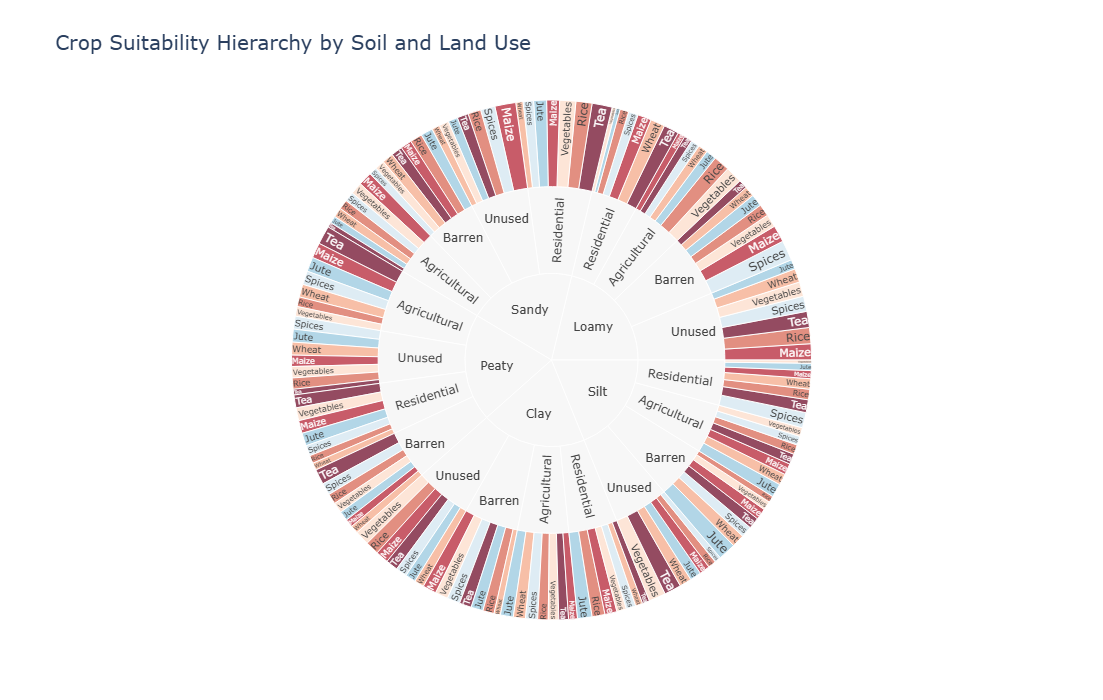

In [21]:
fig11 = px.sunburst(df, path=['Soil_Type', 'Land_Use_Type', 'Crop_Suitability'], 
                   title="Crop Suitability Hierarchy by Soil and Land Use",
                   color='Crop_Suitability',
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig11.update_layout(
    width=900,
    height=700,
    title_font_size=20,
    font=dict(size=12),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig11.show()


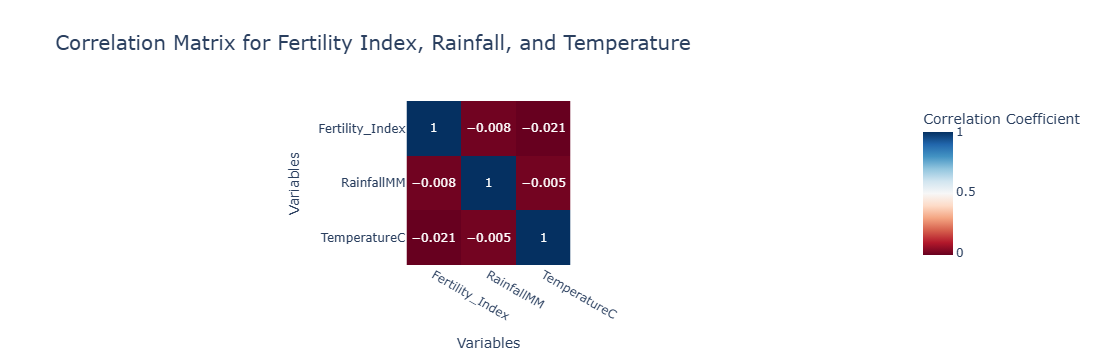

In [22]:
corr_matrix = df[['Fertility_Index', 'RainfallMM', 'TemperatureC']].corr()
corr_matrix = corr_matrix.map(lambda x: f"{x:.3f}")

fig12 = px.imshow(corr_matrix, 
                 labels=dict(x="Variables", y="Variables", color="Correlation Coefficient"),
                 title='Correlation Matrix for Fertility Index, Rainfall, and Temperature',
                 color_continuous_scale='RdBu', text_auto=True)

fig12.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', title_font_size=20, font=dict(size=12))
fig12.show()

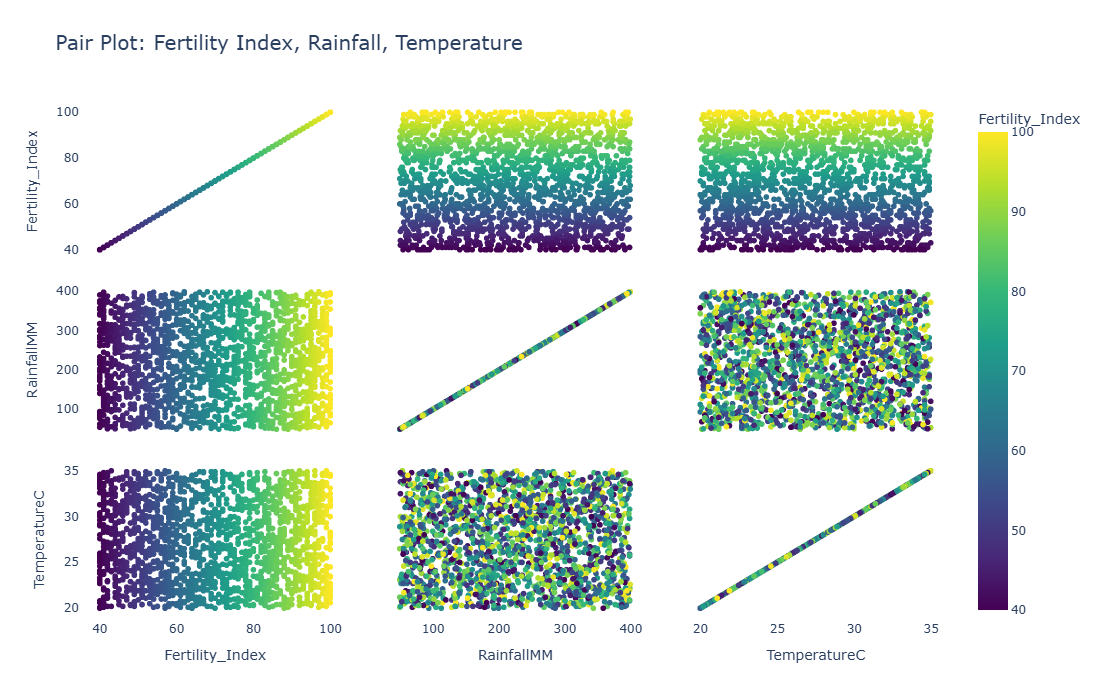

In [33]:
fig13 = px.scatter_matrix(df,
                         dimensions=['Fertility_Index', 'RainfallMM', 'TemperatureC'],
                         title="Pair Plot: Fertility Index, Rainfall, Temperature",
                         color="Fertility_Index",
                         color_continuous_scale='Viridis'
                        )

fig13.update_layout(
    width=900,
    height=700,
    title_font_size=20,
    font=dict(size=12),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig13.show()


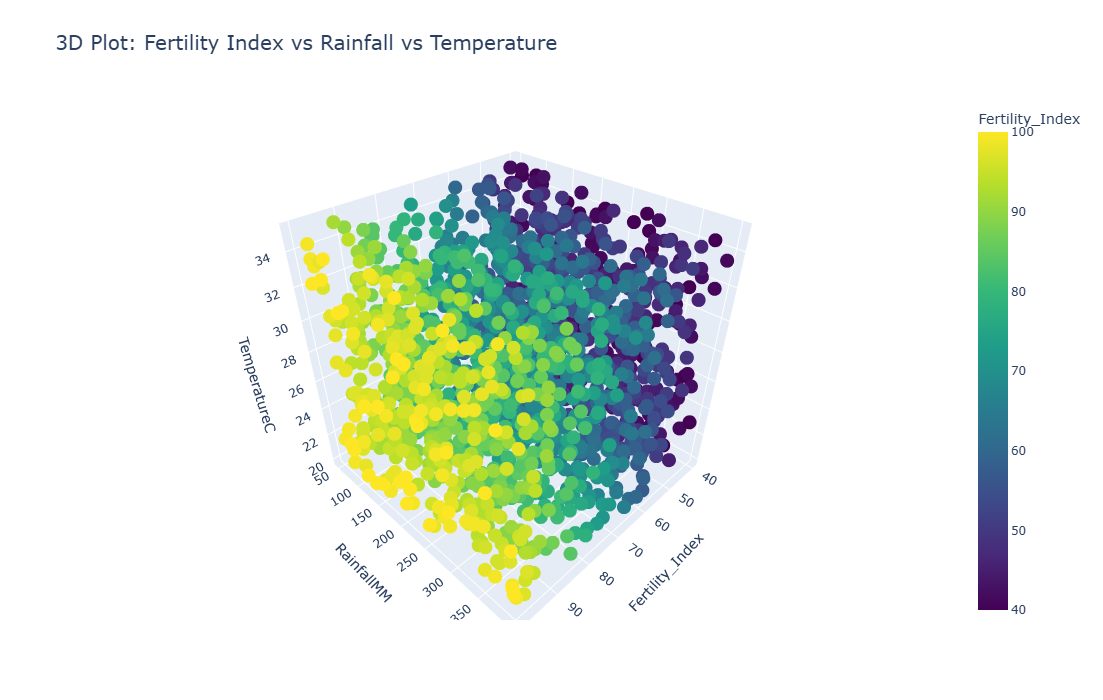

In [34]:
fig14 = px.scatter_3d(df, x='Fertility_Index', y='RainfallMM', z='TemperatureC',
                     title="3D Plot: Fertility Index vs Rainfall vs Temperature",
                     color='Fertility_Index',
                     color_continuous_scale='Viridis')

fig14.update_layout(
    width=900,
    height=700,
    title_font_size=20,
    font=dict(size=12),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig14.show()